# **Assignment 2: Content Analysis and Regression**

For this assignment, you need to test a hypothesis using multiple linear regression. Before doing that, you also need to use computational content analysis and NLP techniques to create new variables that you will use as a predictor in the regression model.

##**Research Background**##

According to Chatman (1980), characters are constructs within abstracted narratives, described through networks of personality traits (e.g., Sarrasine is feminine, Othello is jealous, Roland Deschain is brave). Docherty characterizes the process of depicting and interpreting characters in literature as 'characterization' (cited by Bennett and Royle, 2017). Reaske (1996) identifies several devices of characterization, including character appearance, asides and soliloquies, dialogue, hidden narration, language, and actions performed. Characterization is crucial in narrative because it allows readers to relate to characters and feel emotionally engaged in the story (Cohen, 2001). providing information on personalities and behaviors for gender representation analysis in fiction.

For this assignment, you'll work with a corpus of the genre Real Person Fiction (RPF), where characters are characterized by blending real-life traits with fans' interpretations and reimagination, reflecting societal and cultural trends.

On the online fanfiction platform AO3, fanfictions about the Korean boy band BTS represent the largest fandom, surpassing even the Marvel Universe and Harry Potter franchises. Research into the global popularity of the Korean Wave (*Hallyu*) has highlighted the concept of "manufactured versatile masculinity" exhibited by male K-pop idols, a blend of softer, more effeminate appearances or behaviors with traditional forms of hegemonic masculinity, described by scholars such as Jung (2011), Kuo et al. (2020), Kwon (2019), and Oh (2015). Oh (2015) terms this "liminal masculinity," with androgynous K-pop male idols crossing gender lines.

**Aim:**

This assignment aims to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfictions.

**Data:**

We will utilize a dataset from the GOLEM project, comprising 100 BTS-related fanfictions, including story ID, publication year, word count, kudos, comments, and story content in English (1,000 to 1,200 words).

**Methods:**
- operationalize the concept of 'soft masculinity' to make it measurable
- use regression analysis to test a hypothesis

In [1]:
# Load and check the dataset
import pandas as pd
file_path = '/Users/gillian/Desktop/DATA/A2/A2_Analysing_Data/BTS_short_100.csv'
df = pd.read_csv(file_path, encoding="UTF-8")
df.head()


,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
2,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
4,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...


Have you noticed something odd in the first five lines of this dataset?

There are some duplicates.

So first we need to do some data cleaning, checking how many rows are duplicated and deleting the duplicates.


In [2]:
# Get the number of unique rows
unique_story_ids = df['story_id'].nunique()

# Print the result
print(f"The number of unique 'story_id' values is: {unique_story_ids}")

The number of unique 'story_id' values is: 90


In [3]:
# Remove duplicate rows
df = df.drop_duplicates()

df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."


In [4]:
# Let's check how many rows there are now
df.shape[0]

90

##**Research Design**##
The steps of this research involve formulating a hypothesis, selecting `kudos` as a proxy for the success of a story -- the dependent variable (Y) -- and calculating a masculinity score to be used as the independent variable (x1). We will also use additional variables that are also likely to have an effect on the success of a story: `publication_year` (x2) - because AO3 user base has grown in time and more recent stories are more likely to receive more kudos simply becasue there are more readers on the platform - and lexical richness (x3) - because it's plausible that a story with a richer vocabulary also has a better style and, therefore, it's liked more by readers.

Note that we don't have variables for `masculinity_score` and `lexical_richness` yet, so we need to calculate them from the text of the stories.

The hypothesis states:

H1: Low levels of masculinity in male characters positively affects fanfiction success when controlling for publication year and lexical richness.

**H0: What is the null hypothesis?**

In [74]:
# H0 (answer in words):

#Low levels of masculine traits in male characters has no significant effect on the success of fan fiction, when controlling for year of publication and vocabulary richness

SyntaxError: invalid syntax (3489459573.py, line 5)

##**Compute Masculinity Score**##

To calculate a sterotypical masculinity score, we can refer to older theories of perceived gender identity that probably define gender roles in a stereotypical way. an example of this is the Bem Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974), which classifies personality traits into masculine, feminine, and androgynous.

Bem divides personal traits into 60 traits: 20 masculine traits, 20 feminine traits and 20 neutral traits (see figure below).


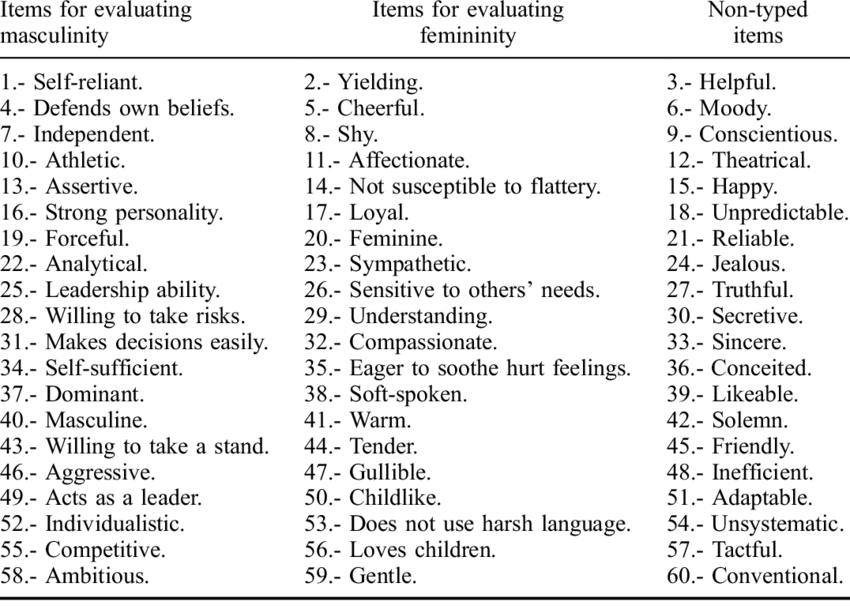

The above list shows that, despite recent discussions about masculinity, femininity, and gender roles have become more diversified, traditional definitions such as those provided by the Bem Sex-Role Inventory (BSRI) can be useful to detect gender stereotypes. Within the definitions of masculinity and femininity outlined by the BSRI, we observe a clear power imbalance: masculinity is associated with dominance (e.g., assertive, strong personality, forceful, leadership ability, dominant, aggressive, ambitious), while femininity leans towards submissiveness (e.g., yielding, understanding, tender). Therefore, we can consider employing the power-agent frames designed by Sap et al. to compute a power score for the male characters in the fanfiction stories. Lower masculinity scores can be plausibly associated with a representation of 'soft masculinity' in relation to a character.

###**Riveter**###

In the W5 lab, we have already gained preliminary experience with the Riveter pipeline.

In this section, we will use utilize the Riveter pipeline with Sap's power-agent frames to calculate the `masculinity_score` for identifiable agents in the text. Since we are interested only in the masculinity of male characters, we will use regular expressions to identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`. This score will be added to the df as a new column.


In [75]:
# Set up everything you need to use Riveter, following the notebook we used in W5 lab
# No need to put the code here, as long as it's working
# We assume that you have installed all the required packages, either locally or on Colab

In [76]:

! git clone https://github.com/maartensap/riveter-nlp.git
    

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Cloning into 'riveter-nlp'...
remote: Enumerating objects: 610, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 610 (delta 141), reused 164 (delta 109), pack-reused 392
Receiving objects: 100% (610/610), 5.24 MiB | 2.24 MiB/s, done.
Resolving deltas: 100% (374/374), done.


In [6]:
#Making sure riveter is downloaded and we are working in the right directory 
%ls

%cd /Users/gillian/Desktop/DATA/A2/A2_Analysing_Data/riveter-nlp/riveter/

__init__.py                df.csv
data/                      riveter-nlp/
demo-Little-Red-Cap.ipynb  riveter.py
demo-NYT-Obits.ipynb       test
demo-reorganized.ipynb     test_suite.py
demo.ipynb
/Users/gillian/Desktop/DATA/A2/A2_Analysing_Data/riveter-nlp/riveter


Now we have prepared all the dependencies needed.

In [116]:
#installing spacy to make riveter work
!pip install -U spacy-experimental
!pip install https://github.com/explosion/spacy-experimental/releases/download/v0.6.0/en_coreference_web_trf-3.4.0a0-py3-none-any.whl#egg=en_coreference_web_trf# This will downlaod ~500Mb of data
!pip install -U spacy-experimental
!python -m spacy download en_core_web_sm




huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
zsh:1: no such user or named directory: 500Mb
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELI

In [7]:
from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter # if the notebook is not in the /riveter folder, this will throw an error

import seaborn as sns
import matplotlib.pyplot as plt



/Users/gillian/anaconda3/lib/python3.11/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_coreference_web_trf' (3.4.0a0) was trained with spaCy v3.3.0 and may not be 100% compatible with the current version (3.7.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


**Prepare the corpus**:

First, we can try to initialize two lists to store `story_content` and `story_id`, but this will casue the problem below:

`Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512).`

This is a limit of the language model (BERT) used by Riveter. We need to split the file into smaller chunks in order for it to be processed correctly. The example in the original Riveter notebook where they load *Pride and Prejudice* shows how we can do this. The code is also provided here below.




In [8]:
#define funtion to split text into segments
def split_text_into_segments(text, max_length=512):
    """
    Segment the text so that each segment contains a maximum of max length tokens.
    """
    segments = []
    current_segment = []
    for word in text.split():
        if len(current_segment) + len(word.split()) <= max_length:
            current_segment.append(word)
        else:
            segments.append(' '.join(current_segment))
            current_segment = [word]
    if current_segment:
        segments.append(' '.join(current_segment))
    return segments

In [9]:
#check if the function works
for index, row in df.iterrows():
    text = row['story_content']  
    segments = split_text_into_segments(text)
    
    for segment in segments:
        print(segment)
        print("------")

library snacks & 3AM promises Author's Note: Idol HP au has been in my head for days now cause Cat (CocoaCatnip) and I have been freaking out over it, and she wrote a cute thing (go read it, it's precious cute fluffy daejae) so I decided to write a thing, and since I've been on a namjin kick lately... ye. This turned out a lot fluffier than I was expecting, jeez. Featuring Hufflepuff 5th Year Seokjin and Ravenclaw 4th Year Namjoon, because yes. It was around the time of night that things usually quieted down around the school, late enough that those who'd been set on making a good time of the night had petered off into smaller, quieter groups tucked out of easy sight, and those who actually cared about being awake for morning classes had long fallen asleep. Give or take a few handfuls of last minute homework-ers. Seokjin would've liked to be one of the privileged already getting their beauty rest, but instead, he was en route to the library, robes lined with a generous supply of leftov

Let's first initialize Riveter with the lexicon that we are going to use:

In [10]:
# Q0 (code): Load lexicon 'power' and create an empty dictionary called 'scores_dict'
riveter = Riveter()
riveter.load_sap_lexicon('power')

scores_dict = {}

Now we can apply the splitting function we defined above and then use Riveter on our corpus. To do this, we need to create a loop that iterates through all the rows in the dataframe and compute scores for each story.

**Q1. Train Riveter to assign scores to text based on male pronouns**

In [12]:
from tqdm import tqdm # used to display a progress bar when executing code

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing stories"):
    story_id = row['story_id']
    story_content = row['story_content']

    # apply the splitting function:
    segments = split_text_into_segments(story_content)
    text_ids = [f"{story_id}_{i}" for i in range(len(segments))]

    # Q1 (code): train riveter specifying 'persona_patterns_dict= ' to assign scores only based on male pronouns
    # write code below:
    
    #trains riveter using only male pronouns in the persona dictonary
    riveter.train(segments,
             text_ids,
             num_bootstraps=20,
             persona_patterns_dict={'masculine': r'^he$|^him$|^himself$'})
    

    # store the computed scores in a dictionary
    persona_score_dict = riveter.get_score_totals()
    masculine_score = persona_score_dict.get('masculine', 0)

    # get a feedback about the computed scores while the code is running
    print(f"Story ID: {story_id}, Masculine Power Score: {masculine_score}")

    # store the score of each story in the same dictionary so that we can then add it to the dataframe
    scores_dict[story_id] = masculine_score

# add the dictionary of scores to the dataframe
df['masculine_power_score'] = df['story_id'].map(scores_dict)

Processing stories:   1%|▎                       | 1/90 [00:07<11:30,  7.76s/it]

2024-03-15 19:59:28 Complete!
Story ID: 4706144, Masculine Power Score: 0.09138528138528138



Processing stories:   2%|▌                       | 2/90 [00:14<10:51,  7.40s/it]

2024-03-15 19:59:35 Complete!
Story ID: 4752980, Masculine Power Score: 0.31570940974091877



Processing stories:   3%|▊                       | 3/90 [00:20<09:28,  6.53s/it]

2024-03-15 19:59:40 Complete!
Story ID: 4621698, Masculine Power Score: 0.5625396825396825



Processing stories:   4%|█                       | 4/90 [00:26<08:50,  6.17s/it]

2024-03-15 19:59:46 Complete!
Story ID: 3651108, Masculine Power Score: 0.12725648083512536



Processing stories:   6%|█▎                      | 5/90 [00:32<08:47,  6.21s/it]

2024-03-15 19:59:52 Complete!
Story ID: 5282729, Masculine Power Score: 0.21349999001050893



Processing stories:   7%|█▌                      | 6/90 [00:38<08:46,  6.27s/it]

2024-03-15 19:59:59 Complete!
Story ID: 5533886, Masculine Power Score: -0.00783204631517597



Processing stories:   8%|█▊                      | 7/90 [00:44<08:31,  6.17s/it]

2024-03-15 20:00:05 Complete!
Story ID: 4547622, Masculine Power Score: 0.03104940270867444



Processing stories:   9%|██▏                     | 8/90 [00:49<07:54,  5.79s/it]

2024-03-15 20:00:09 Complete!
Story ID: 16177508, Masculine Power Score: 0.17924742918165462



Processing stories:  10%|██▍                     | 9/90 [00:55<07:46,  5.76s/it]

2024-03-15 20:00:15 Complete!
Story ID: 15745185, Masculine Power Score: -0.10228836231105805



 33%|███████████████                              | 1/3 [00:02<00:05,  2.89s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors

Processing stories:  11%|██▌                    | 10/90 [01:01<07:53,  5.92s/it]

2024-03-15 20:00:21 Complete!
Story ID: 15654528, Masculine Power Score: 0.14595539203944038



Processing stories:  12%|██▊                    | 11/90 [01:07<07:42,  5.86s/it]

2024-03-15 20:00:27 Complete!
Story ID: 7448155, Masculine Power Score: 0.32548843668679994



Processing stories:  13%|███                    | 12/90 [01:13<07:42,  5.92s/it]

2024-03-15 20:00:33 Complete!
Story ID: 4983847, Masculine Power Score: 0.08944314148111616



Processing stories:  14%|███▎                   | 13/90 [01:20<07:52,  6.13s/it]

2024-03-15 20:00:40 Complete!
Story ID: 3313118, Masculine Power Score: -0.22017515998494258



Processing stories:  16%|███▌                   | 14/90 [01:26<07:52,  6.22s/it]

2024-03-15 20:00:46 Complete!
Story ID: 3290390, Masculine Power Score: -0.09524891774891772



Processing stories:  17%|███▊                   | 15/90 [01:34<08:23,  6.71s/it]

2024-03-15 20:00:54 Complete!
Story ID: 36435301, Masculine Power Score: 0.058295947769632



Processing stories:  18%|████                   | 16/90 [01:41<08:24,  6.81s/it]

2024-03-15 20:01:01 Complete!
Story ID: 36575491, Masculine Power Score: 0.2883904236051276



Processing stories:  19%|████▎                  | 17/90 [01:47<07:52,  6.48s/it]

2024-03-15 20:01:07 Complete!
Story ID: 35225224, Masculine Power Score: 0.23538295946783797



Processing stories:  20%|████▌                  | 18/90 [01:52<07:22,  6.15s/it]

2024-03-15 20:01:12 Complete!
Story ID: 4594527, Masculine Power Score: 0.09309149184149186



Processing stories:  21%|████▊                  | 19/90 [01:57<06:59,  5.91s/it]

2024-03-15 20:01:18 Complete!
Story ID: 5485625, Masculine Power Score: 0.10665059078852179



Processing stories:  22%|█████                  | 20/90 [02:02<06:32,  5.60s/it]

2024-03-15 20:01:23 Complete!
Story ID: 36408319, Masculine Power Score: 0.13226254490715955



Processing stories:  23%|█████▎                 | 21/90 [02:10<07:18,  6.36s/it]

2024-03-15 20:01:31 Complete!
Story ID: 35762659, Masculine Power Score: 0.2117177861205639



Processing stories:  24%|█████▌                 | 22/90 [02:16<07:07,  6.28s/it]

2024-03-15 20:01:37 Complete!
Story ID: 35603194, Masculine Power Score: 0.4018351065245275



Processing stories:  26%|█████▉                 | 23/90 [02:23<07:07,  6.38s/it]

2024-03-15 20:01:43 Complete!
Story ID: 35344306, Masculine Power Score: 0.11763948628222887



Processing stories:  27%|██████▏                | 24/90 [02:29<06:46,  6.17s/it]

2024-03-15 20:01:49 Complete!
Story ID: 36695155, Masculine Power Score: 0.1552777777777778



Processing stories:  28%|██████▍                | 25/90 [02:34<06:29,  6.00s/it]

2024-03-15 20:01:55 Complete!
Story ID: 36064474, Masculine Power Score: 0.12723191558291294



Processing stories:  29%|██████▋                | 26/90 [02:41<06:47,  6.37s/it]

2024-03-15 20:02:02 Complete!
Story ID: 36024820, Masculine Power Score: 0.11636267886721607



Processing stories:  30%|██████▉                | 27/90 [02:50<07:20,  6.99s/it]

2024-03-15 20:02:10 Complete!
Story ID: 35182330, Masculine Power Score: 0.03151543865994864



Processing stories:  31%|███████▏               | 28/90 [02:57<07:06,  6.88s/it]

2024-03-15 20:02:17 Complete!
Story ID: 36567496, Masculine Power Score: 0.20826617826617827



Processing stories:  32%|███████▍               | 29/90 [03:03<06:45,  6.65s/it]

2024-03-15 20:02:23 Complete!
Story ID: 35560330, Masculine Power Score: 0.13891140002844787



Processing stories:  33%|███████▋               | 30/90 [03:09<06:39,  6.67s/it]

2024-03-15 20:02:30 Complete!
Story ID: 35877496, Masculine Power Score: 0.10811703487015152



Processing stories:  34%|███████▉               | 31/90 [03:16<06:29,  6.60s/it]

2024-03-15 20:02:36 Complete!
Story ID: 35957410, Masculine Power Score: 0.2879587304149819



Processing stories:  36%|████████▏              | 32/90 [03:22<06:17,  6.51s/it]

2024-03-15 20:02:43 Complete!
Story ID: 30947654, Masculine Power Score: 0.04386139918762424



Processing stories:  37%|████████▍              | 33/90 [03:30<06:26,  6.79s/it]

2024-03-15 20:02:50 Complete!
Story ID: 36332707, Masculine Power Score: -0.19379425690166202



Processing stories:  38%|████████▋              | 34/90 [03:38<06:48,  7.29s/it]

2024-03-15 20:02:58 Complete!
Story ID: 35967940, Masculine Power Score: 0.17014423182101598



Processing stories:  39%|████████▉              | 35/90 [03:45<06:41,  7.31s/it]

2024-03-15 20:03:06 Complete!
Story ID: 35001073, Masculine Power Score: 0.07993700743700746



Processing stories:  40%|█████████▏             | 36/90 [03:54<06:50,  7.60s/it]

2024-03-15 20:03:14 Complete!
Story ID: 35138911, Masculine Power Score: 0.1324144976311943



Processing stories:  41%|█████████▍             | 37/90 [03:58<05:56,  6.72s/it]

2024-03-15 20:03:19 Complete!
Story ID: 35280397, Masculine Power Score: 0.18141586921850078



Processing stories:  42%|█████████▋             | 38/90 [04:03<05:21,  6.18s/it]

2024-03-15 20:03:24 Complete!
Story ID: 36049939, Masculine Power Score: 0.2913923733514668



Processing stories:  43%|█████████▉             | 39/90 [04:08<04:46,  5.61s/it]

2024-03-15 20:03:28 Complete!
Story ID: 34995673, Masculine Power Score: 0.1677820511067412



Processing stories:  44%|██████████▏            | 40/90 [04:12<04:25,  5.30s/it]

2024-03-15 20:03:32 Complete!
Story ID: 33477346, Masculine Power Score: 0.4333011356908877



Processing stories:  46%|██████████▍            | 41/90 [04:16<03:54,  4.78s/it]

2024-03-15 20:03:36 Complete!
Story ID: 36840832, Masculine Power Score: -0.2390236371815319



Processing stories:  47%|██████████▋            | 42/90 [04:19<03:28,  4.34s/it]

2024-03-15 20:03:39 Complete!
Story ID: 30896276, Masculine Power Score: 0.06503759398496241



Processing stories:  48%|██████████▉            | 43/90 [04:22<03:10,  4.05s/it]

2024-03-15 20:03:43 Complete!
Story ID: 37363471, Masculine Power Score: 0.4121212121212121



Processing stories:  49%|███████████▏           | 44/90 [04:26<02:59,  3.89s/it]

2024-03-15 20:03:46 Complete!
Story ID: 36984901, Masculine Power Score: 0.19999054108624711



Processing stories:  50%|███████████▌           | 45/90 [04:30<02:51,  3.81s/it]

2024-03-15 20:03:50 Complete!
Story ID: 33353644, Masculine Power Score: -0.04841564927857935



Processing stories:  51%|███████████▊           | 46/90 [04:33<02:48,  3.83s/it]

2024-03-15 20:03:54 Complete!
Story ID: 37002835, Masculine Power Score: -0.14279942279942281



Processing stories:  52%|████████████           | 47/90 [04:37<02:41,  3.76s/it]

2024-03-15 20:03:57 Complete!
Story ID: 5630824, Masculine Power Score: 0.3093353183380884



Processing stories:  53%|████████████▎          | 48/90 [04:41<02:37,  3.76s/it]

2024-03-15 20:04:01 Complete!
Story ID: 10053617, Masculine Power Score: 0.2134722222222222



Processing stories:  54%|████████████▌          | 49/90 [04:44<02:31,  3.70s/it]

2024-03-15 20:04:05 Complete!
Story ID: 1572659, Masculine Power Score: 0.24821772590154945



Processing stories:  56%|████████████▊          | 50/90 [04:48<02:30,  3.77s/it]

2024-03-15 20:04:09 Complete!
Story ID: 7450573, Masculine Power Score: 0.4665750915750915



Processing stories:  57%|█████████████          | 51/90 [04:52<02:28,  3.80s/it]

2024-03-15 20:04:12 Complete!
Story ID: 6918676, Masculine Power Score: 0.057023848847328064



Processing stories:  58%|█████████████▎         | 52/90 [04:56<02:31,  3.98s/it]

2024-03-15 20:04:17 Complete!
Story ID: 6075402, Masculine Power Score: 0.36328993840193247



Processing stories:  59%|█████████████▌         | 53/90 [05:01<02:28,  4.02s/it]

2024-03-15 20:04:21 Complete!
Story ID: 11101779, Masculine Power Score: 0.33186813186813185



Processing stories:  60%|█████████████▊         | 54/90 [05:05<02:27,  4.09s/it]

2024-03-15 20:04:25 Complete!
Story ID: 11321331, Masculine Power Score: 0.10857303061736412



Processing stories:  61%|██████████████         | 55/90 [05:10<02:37,  4.51s/it]

2024-03-15 20:04:31 Complete!
Story ID: 12284853, Masculine Power Score: 0.035860753814718004



Processing stories:  62%|██████████████▎        | 56/90 [05:15<02:36,  4.62s/it]

2024-03-15 20:04:36 Complete!
Story ID: 12282003, Masculine Power Score: 0.07557554954580126



Processing stories:  63%|██████████████▌        | 57/90 [05:19<02:27,  4.47s/it]

2024-03-15 20:04:40 Complete!
Story ID: 7613533, Masculine Power Score: 0



Processing stories:  64%|██████████████▊        | 58/90 [05:24<02:22,  4.47s/it]

2024-03-15 20:04:44 Complete!
Story ID: 4228053, Masculine Power Score: 0.2170740566509948



Processing stories:  66%|███████████████        | 59/90 [05:28<02:19,  4.51s/it]

2024-03-15 20:04:49 Complete!
Story ID: 12127317, Masculine Power Score: 0.10890945716263319



Processing stories:  67%|███████████████▎       | 60/90 [05:33<02:12,  4.42s/it]

2024-03-15 20:04:53 Complete!
Story ID: 12010134, Masculine Power Score: 0.24570610436810464



Processing stories:  68%|███████████████▌       | 61/90 [05:37<02:11,  4.55s/it]

2024-03-15 20:04:58 Complete!
Story ID: 11510919, Masculine Power Score: 0.4172246272246272



Processing stories:  69%|███████████████▊       | 62/90 [05:42<02:06,  4.53s/it]

2024-03-15 20:05:02 Complete!
Story ID: 8145802, Masculine Power Score: 0.268476189014781



Processing stories:  70%|████████████████       | 63/90 [05:47<02:03,  4.59s/it]

2024-03-15 20:05:07 Complete!
Story ID: 6637942, Masculine Power Score: -0.12210961629152288



Processing stories:  71%|████████████████▎      | 64/90 [05:51<01:56,  4.46s/it]

2024-03-15 20:05:11 Complete!
Story ID: 7427905, Masculine Power Score: -0.030379084967320263



Processing stories:  72%|████████████████▌      | 65/90 [05:55<01:49,  4.37s/it]

2024-03-15 20:05:15 Complete!
Story ID: 3893857, Masculine Power Score: 0.10443087871943976



Processing stories:  73%|████████████████▊      | 66/90 [05:59<01:43,  4.32s/it]

2024-03-15 20:05:20 Complete!
Story ID: 33040258, Masculine Power Score: 0.15770553835569315



Processing stories:  74%|█████████████████      | 67/90 [06:04<01:39,  4.34s/it]

2024-03-15 20:05:24 Complete!
Story ID: 33858850, Masculine Power Score: -0.16795136408139505



Processing stories:  76%|█████████████████▍     | 68/90 [06:08<01:36,  4.39s/it]

2024-03-15 20:05:28 Complete!
Story ID: 2775776, Masculine Power Score: 0.26940834527791047



Processing stories:  77%|█████████████████▋     | 69/90 [06:12<01:31,  4.38s/it]

2024-03-15 20:05:33 Complete!
Story ID: 3197963, Masculine Power Score: 0.3127350427350427



Processing stories:  78%|█████████████████▉     | 70/90 [06:17<01:27,  4.37s/it]

2024-03-15 20:05:37 Complete!
Story ID: 12395199, Masculine Power Score: 0.12421684517243861



Processing stories:  79%|██████████████████▏    | 71/90 [06:21<01:19,  4.19s/it]

2024-03-15 20:05:41 Complete!
Story ID: 10934010, Masculine Power Score: 0.26377442002442



Processing stories:  80%|██████████████████▍    | 72/90 [06:25<01:14,  4.16s/it]

2024-03-15 20:05:45 Complete!
Story ID: 12301116, Masculine Power Score: -0.09118543561874735



Processing stories:  81%|██████████████████▋    | 73/90 [06:29<01:11,  4.21s/it]

2024-03-15 20:05:49 Complete!
Story ID: 12706317, Masculine Power Score: -0.10496296458625524



Processing stories:  82%|██████████████████▉    | 74/90 [06:33<01:08,  4.29s/it]

2024-03-15 20:05:54 Complete!
Story ID: 11499468, Masculine Power Score: 0.03330160946186949



Processing stories:  83%|███████████████████▏   | 75/90 [06:37<01:02,  4.16s/it]

2024-03-15 20:05:58 Complete!
Story ID: 12184146, Masculine Power Score: 0.305227638989948



Processing stories:  84%|███████████████████▍   | 76/90 [06:41<00:57,  4.13s/it]

2024-03-15 20:06:02 Complete!
Story ID: 12201333, Masculine Power Score: 0.0973900694893342



Processing stories:  86%|███████████████████▋   | 77/90 [06:46<00:55,  4.30s/it]

2024-03-15 20:06:06 Complete!
Story ID: 11496030, Masculine Power Score: 0.05817212745316498



Processing stories:  87%|███████████████████▉   | 78/90 [06:50<00:51,  4.33s/it]

2024-03-15 20:06:11 Complete!
Story ID: 11510277, Masculine Power Score: 0.16042354859393618



Processing stories:  88%|████████████████████▏  | 79/90 [06:56<00:50,  4.57s/it]

2024-03-15 20:06:16 Complete!
Story ID: 10772274, Masculine Power Score: 0.4266521646563275



Processing stories:  89%|████████████████████▍  | 80/90 [07:00<00:45,  4.56s/it]

2024-03-15 20:06:21 Complete!
Story ID: 12646050, Masculine Power Score: 0.0439258658008658



Processing stories:  90%|████████████████████▋  | 81/90 [07:04<00:40,  4.45s/it]

2024-03-15 20:06:25 Complete!
Story ID: 11161479, Masculine Power Score: -0.04905600545285278



Processing stories:  91%|████████████████████▉  | 82/90 [07:09<00:35,  4.41s/it]

2024-03-15 20:06:29 Complete!
Story ID: 12069936, Masculine Power Score: 0.0658392251442668



Processing stories:  92%|█████████████████████▏ | 83/90 [07:13<00:31,  4.44s/it]

2024-03-15 20:06:34 Complete!
Story ID: 12285972, Masculine Power Score: 0.463775436429185



Processing stories:  93%|█████████████████████▍ | 84/90 [07:17<00:26,  4.37s/it]

2024-03-15 20:06:38 Complete!
Story ID: 12372702, Masculine Power Score: 0.008224194571642137



Processing stories:  94%|█████████████████████▋ | 85/90 [07:21<00:21,  4.29s/it]

2024-03-15 20:06:42 Complete!
Story ID: 12610496, Masculine Power Score: 0.10116635607173877



Processing stories:  96%|█████████████████████▉ | 86/90 [07:26<00:17,  4.30s/it]

2024-03-15 20:06:46 Complete!
Story ID: 10970472, Masculine Power Score: 0.09445078363092678



Processing stories:  97%|██████████████████████▏| 87/90 [07:30<00:12,  4.18s/it]

2024-03-15 20:06:50 Complete!
Story ID: 12084552, Masculine Power Score: 0.30751151869572924



Processing stories:  98%|██████████████████████▍| 88/90 [07:35<00:08,  4.42s/it]

2024-03-15 20:06:55 Complete!
Story ID: 12727119, Masculine Power Score: 0.015565531956789952



Processing stories:  99%|██████████████████████▋| 89/90 [07:39<00:04,  4.30s/it]

2024-03-15 20:06:59 Complete!
Story ID: 11962824, Masculine Power Score: 0.0



Processing stories: 100%|███████████████████████| 90/90 [07:43<00:00,  5.15s/it]

2024-03-15 20:07:03 Complete!
Story ID: 10859508, Masculine Power Score: 0.2524590514252941


**Q2. Print a sample of the dataframe to check whether the `masculine_power_score` has been added correctly**

In [13]:
# Q2 (code)
#Make sure masculine_power_score is added and check it using head()
df['masculine_power_score'] = df['story_id'].map(scores_dict)
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.091385
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.315709
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.562540
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.127256
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.213500


In [14]:
# If you use google colab, it's better to save this result locally in case the connection breaks and then you lose the result.
df.to_csv('df.csv', index=False)

##**Compute Lexical Richness Score**##

'Lexical richness' refers to the range and variety of vocabulary deployed in a text by a speaker/writer. 'Lexical richness' is a term used interchangeably with 'lexical diversity', 'lexical variation', 'lexical density', and 'vocabulary richnes', and it's measured by a wide variety of indices. Uses include (but are not limited to) measuring writing quality, vocabulary knowledge, speaker competence, and socioeconomic status.


The type-token ratio (TTR) is a simple measure of lexical diversity within a text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens) in the given text. A higher TTR indicates a greater variety of vocabulary, suggesting richer lexical content. Conversely, a lower TTR suggests more repetitive use of vocabulary. TTR is often used to assess the lexical complexity of written or spoken material.

Here we use the package `lexicalrichness` (https://pypi.org/project/lexicalrichness/) to compute type-token ratio (TTR) for each story as a control on their language quality.

In [ ]:
!pip install lexicalrichness

In [15]:
from lexicalrichness import LexicalRichness

# Define a function that calculates the lexical richness of the text
def calculate_lexical_richness(text):
    # Create a LexicalRichness object for the text
    lex = LexicalRichness(text)
    # Compute type-token ratio (TTR)
    return lex.ttr  # Returns the type-token ratio

# Apply the function to the 'story content' column in the DataFrame
df['lexical_richness'] = df['story_content'].apply(calculate_lexical_richness)

# Display the DataFrame with the new 'lexical_richness' column
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score,lexical_richness
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.091385,0.428571
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.315709,0.400665
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.562540,0.428986
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.127256,0.412295
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.213500,0.376110


Now that we have both the two new variables added to the dataframe, we have all we need to test our hypothesis with linear regression.

##**Regressions**##


**Methodology**

- Multiple Linear Regression: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `words` as independent variables.
- Residual Analysis: Conduct normality and homoscedasticity tests on the residuals to validate the assumptions of linear regression.
- Model Evaluation: Assess the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
- Multicollinearity Check: Calculate the Variance Inflation Factor (VIF) for the independent variables to detect possible multicollinearity.

**Q3. Check the data distribution and handle missing values**


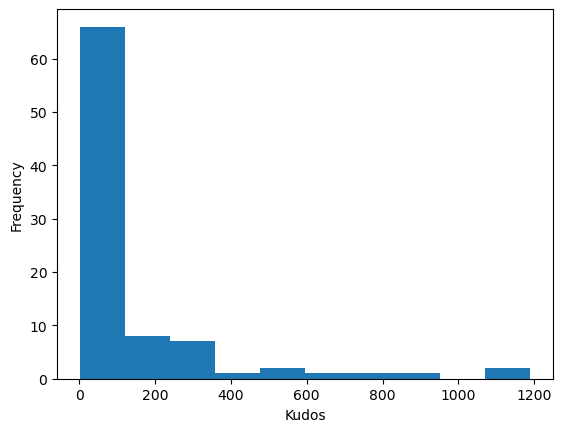

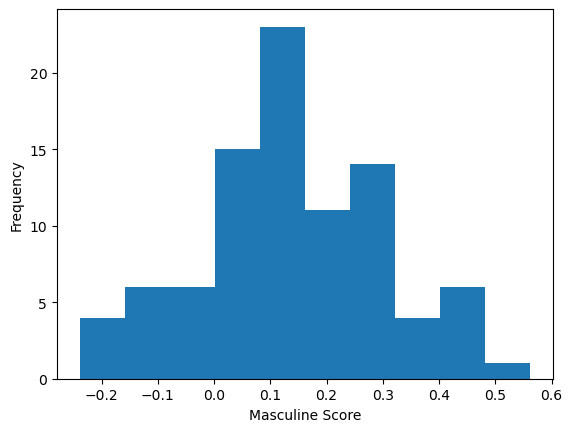

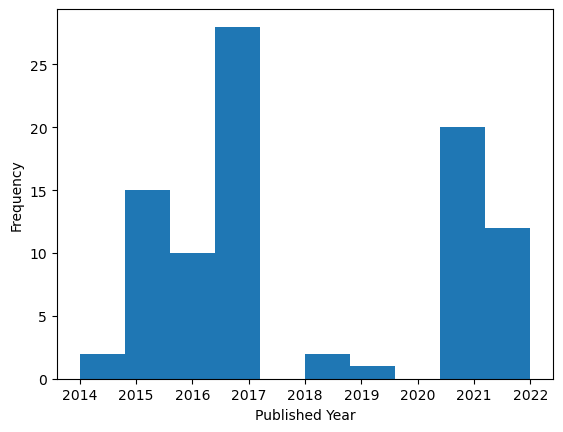

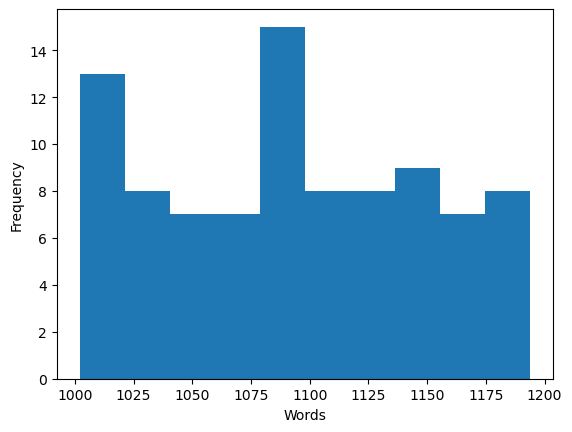

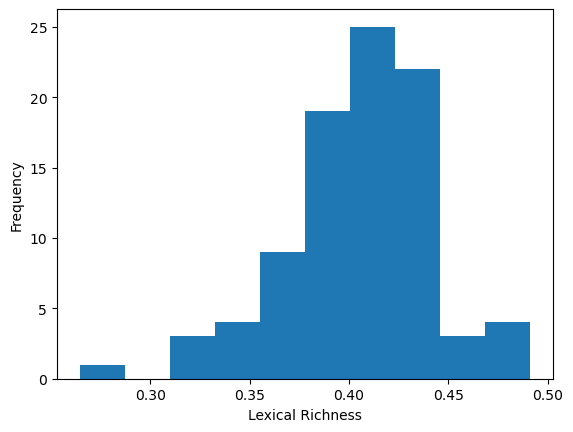

In [16]:
# Q3a (code): Check data distribution

#using histograms to investigate the distribution of our variables
plt.hist(df['kudos']) 
plt.xlabel('Kudos')  
plt.ylabel('Frequency')
plt.show()

plt.hist(df['masculine_power_score']) 
plt.xlabel('Masculine Score')  
plt.ylabel('Frequency')
plt.show()


plt.hist(df['published_year'])
plt.xlabel('Published Year')  
plt.ylabel('Frequency')
plt.show()


plt.hist(df['words']) 
plt.xlabel('Words')  
plt.ylabel('Frequency')
plt.show()


plt.hist(df['lexical_richness'])   
plt.xlabel('Lexical Richness')  
plt.ylabel('Frequency')
plt.show()

In [87]:
# Q3b (code): compute some descriptive statistics
df.describe()

,story_id,published_year,words,kudos,comments,masculine_power_score,lexical_richness
count,9.000000e+01,90.000000,90.000000,89.000000,65.000000,90.000000,90.000000
mean,1.839576e+07,2018.088889,1094.344444,135.393258,6.923077,0.138631,0.405027
std,1.307922e+07,2.612177,55.327048,229.972311,7.005149,0.166392,0.037109
min,1.572659e+06,2014.000000,1002.000000,1.000000,1.000000,-0.258285,0.264443
25%,7.448760e+06,2016.000000,1042.250000,20.000000,2.000000,0.018078,0.384458
50%,1.224167e+07,2017.000000,1095.000000,54.000000,5.000000,0.137254,0.410169
75%,3.517148e+07,2021.000000,1141.750000,122.000000,9.000000,0.251692,0.428415
max,3.736347e+07,2022.000000,1194.000000,1190.000000,36.000000,0.556190,0.491349


In [17]:
# Q3c (code): Check for any missing values
#This prints for each variable how many missing values there are.
print(df['kudos'].isnull().sum())
print(df['published_year'].isnull().sum())
print(df['masculine_power_score'].isnull().sum())
print(df['words'].isnull().sum())
print(df['lexical_richness'].isnull().sum())


1
0
0
0
0


In [18]:
# Q3d (code): replace all the NA values with zeros and check again Q3c
#We see there is only 1 NA for kudos so we thus replace the NAs in kudos to 0
df['kudos'] = df['kudos'].fillna(0) 


#and we check the total amount of NAs again to check if we removed all of them
print(df['kudos'].isnull().sum())
print(df['published_year'].isnull().sum())
print(df['masculine_power_score'].isnull().sum())
print(df['words'].isnull().sum())
print(df['lexical_richness'].isnull().sum())


0
0
0
0
0


It's always important to visualize the data to inspect the distributions of values for the variables your interested in (do you remember the dinosaur data shown in class?).

**Q4. Create a scatterplot with `masculine_power_score` and `kudos`**

Text(0, 0.5, 'kudos')

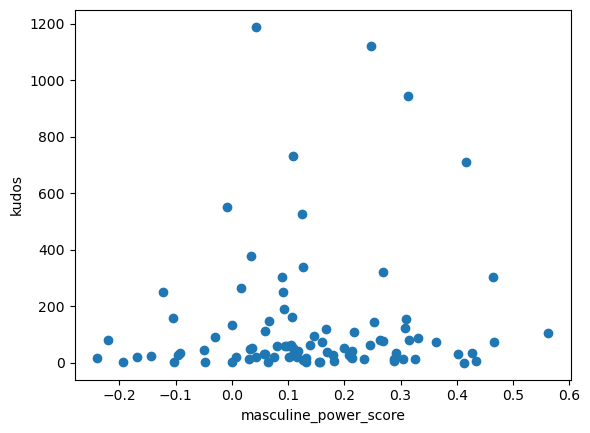

In [19]:
# Q4 (code): Create a scatterplot with masculine_power_score and kudos
plt.scatter(df['masculine_power_score'],df['kudos']) 
plt.xlabel('masculine_power_score')
plt.ylabel('kudos')

**Q5. Multiple Regression and Analysis**

In [20]:
# Q5 (code): Do OLS Multiple Regression and print the regression result summary


# the methodology says: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `words` as independent variables.
#However i think words is supposed to mean lexical_richness as that is the X3 mentioned in the beginning of the assignment and otherwise there would be no purpose to including the lexical_richness into the dataframe.


import statsmodels.api as sm

#Assuming x3 = lexical_richness, define our covariates as x
x = df[['masculine_power_score', 'published_year', 'lexical_richness']] 

#Define y as the dependent variable
y = df['kudos']  

#We want to include an intercept into our regression so we add it to the covariates here
x = sm.add_constant(x)

#estimate model
model = sm.OLS(y, x).fit()


#print summary of OLS
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                  kudos   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     5.566
Date:                Fri, 15 Mar 2024   Prob (F-statistic):            0.00154
Time:                        20:12:34   Log-Likelihood:                -608.30
No. Observations:                  90   AIC:                             1225.
Df Residuals:                      86   BIC:                             1235.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.978e+

**Q6. Interpret the results of the regression analysis**

In [55]:
# Q6a (words): Interpret the R-squared and Adj. R-squared

#The model's R-squared is 0.163 and this indicates that 16.3% of the variabillity in the dependent variable kudos can be explained by the independent variables. 
#This signifies that the model is able to predict a portion of the dependent variable, there remains a significant amount unaccounted for.


#The adjusted R-squared of 0.133 penalizes the R-squared for the number of predictors it uses, showing a slight decrease in the value which is normal for the numer of terms in the model. 

In [56]:
# Q6b (words): Interpret F-test result

#The p-value of the F test 0.00154 shows that the variables are jointly significant under the 1% significance level. Hence indicating that the predictive power of this model is significantly better than a model including only the intercept

In [ ]:
# Q6c (words): Interpret coefficients and t-test result

#The p-values of the constant and published years are both <0 meaning they are significantly different from 0 under any significance level. and indicates a significant effect on the dependent variable. 
#The p-values of lexical richness and masculine power score are not too big to be significant under any meaning full significance level hence we fail to reject the null that it does not have any impact on the number of kudos hence giving evidence that it does not significantly effect out dependent variable.


Based on the OLS regression results provided, here is an example analysis:

The model's R-squared value of 0.162 indicates that approximately 16.2% of the variability in the kudos can be explained by the model. While this suggests that the model explains a portion of the variability, there remains a significant amount unaccounted for, which might be explained by factors not included in the model.

The adjusted R-squared value of 0.133 takes into account the number of predictors in the model and the number of observations, showing a slight decrease from the R-squared value, which is normal as it adjusts for the number of terms in the model.

Looking at the coefficients:

const (6.995e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.
masculine_power_score (59.7927): This variable is not statistically significant (p-value 0.668) with a wide confidence interval, suggesting that the masculine power score does not significantly impact the number of kudos in the given dataset.
lexical_richness (390.3633): Similar to the masculine power score, lexical richness does not appear to significantly affect the number of kudos (p-value 0.524).
published_year (-34.6801): This is the only variable with a statistically significant coefficient (p-value < 0.001), indicating that more recent stories tend to have fewer kudos.
The large F-statistic (5.561) and its associated low probability (0.00155) suggest that the overall model is statistically significant compared to a model without any predictors.

**Q7: Residual Analysis**

Normality Test, Homoscedasticity Test

In [26]:
# Q7a (code): Calculate residuals and do a Shapiro-Wilk Test
from scipy.stats import shapiro 

#calculate the dependent variable the model would predict for each data point
predicted_y = model.predict(x)

#residuals are defined as the difference between actual y and the model predicted y
residuals = y - predicted_y

print(shapiro(residuals))


ShapiroResult(statistic=0.6872295141220093, pvalue=1.5009831485363057e-12)


In [93]:
# Q7b (words): Write your analysis for the Normality Test there:

#we see that the pvalue is very low, lower than 5% or even 1% meaning we reject the null under the 1% significance level meaning we reject that it is normally distributed.

Text(0, 0.5, 'residuals')

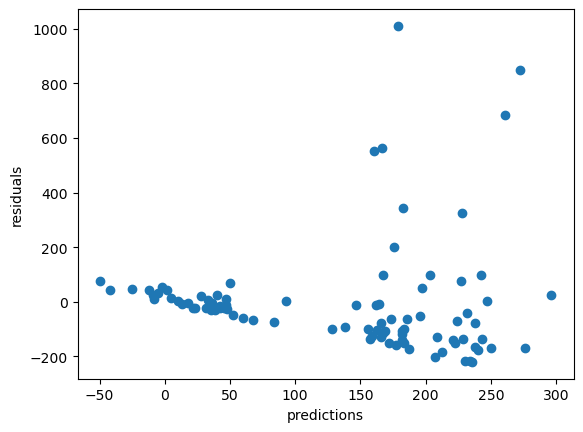

In [27]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions)
#make scatter plot to test the residuals vs the predictions
plt.scatter(predicted_y,residuals) 
plt.xlabel('predictions')
plt.ylabel('residuals')

In the residuals vs. predicted values plot, you would look for patterns. In a well-fitted model, you would expect to see the residuals randomly scattered around zero, with no clear pattern. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity.

In [96]:
# Q7d (words): Write your analysis for the Homoscedasticity Test here:

#There seems to be a pattern present as the residuals get exponentially bigger as the predicted values increase.
#furthermore, the residuals do not seem to represent white noise at all. Hence we conclude that there is likely heteroskedasity present in our model.

**Q8: Multicollinearity**

In [25]:
# Q8a (code)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#add constant to the data to include into VIF analysis
df = sm.add_constant(df)


#We only want VIF for these variables
df= df[['lexical_richness', 'masculine_power_score', 'published_year', 'const']] 

#Create empty datafram to save the results in
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns 

#Run VIF for every independent variable
vif_data["VIF"] = [variance_inflation_factor(df.values, i) 
                          for i in range(len(df.columns))] 

print(vif_data)





                 feature            VIF
0       lexical_richness       1.006994
1  masculine_power_score       1.011809
2         published_year       1.008381
3                  const  608086.108201


Regarding multicollinearity, the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1, which suggests low multicollinearity. However, the very high VIF for the const term, along with the large condition number, suggests that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

In [ ]:
# Q8b (words): Write your analysis for the multicollinearity test here:
#Regarding multicollinearity, the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1, which suggests low multicollinearity. However, the very high VIF for the const term, along with the large condition number, suggests that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

**Q9: Reflection**

In [ ]:
# Q9 (words): Write your reflection on the whole research framework and corresponding result here, e.g., what do you think can be improved?


#Firstly, the results of the homoskedacity test suggests that there is heteroskedacity present. Making the estimated standard errors biased and thus the inferences of the significance tests for the coefficents are unreliable. A solution for this is using robust standard errors.

#Secondly, we found no significant effect for our variable of interest, masculine_power_score. a possible explanation for this is that we assumed a linear relation between it and kudos. To further explore the relationship between succes and masculine_power_score we could discretize masculine_power_score into and indicator variable for whether the score is high or low and see if that does have a significant effect. 

#Thirdly, again, we assume a linear relationship of published_year. If we had more data points, a more common approach would be to include published_year fixed effects which would allow for rises and decreases in popularity from time to time.

#Furthermore even when accounting for lexical_richness and published_year this model clearly suffers from omitted variable bias, making all the estimates biased as a restult. For example, one could imagine that the masculine_power_score of someones writing is influenced by their gender which could contribute to the succesfulness of the fanfiction. Another example would be the member of which the fanfiction is about, BTS is a big group with a variety of popularity between members. I would imagine that the member of the group influences the way of writing (maybe they act more masculine) and the popularity of the fanfiction.

##**Reference:**##

Seymour Benjamin Chatman. 1980. Story and Discourse: Narrative Structure in Fiction and Film. Cornell University Press, Ithaca, NY, USA.

Bennet, Andrew, and Nicholas Royle. Introduction to Literature Criticism and Theory. Edinburgh: Pearson Education Limited, 2004.Web.July. 2017.

Reaske, Christoper Russel. Analyze Drama. New York: Monarch Press, 1996. Print.

Jung, Sun “Bae Yong-Joon, Soft Masculinity, and Japanese Fans: Our Past Is in Your Present Body” from Korean Masculinities and Transcultural Consumption, Hong Kong Scholarship Online, 2010.

Kuo, Linda, et al., “Performance, Fantasy, or Narrative: LGBTQ+ Asian American Identity through Kpop Media in Fandom”, Journal of Homosexuality, 2020.

Kwon, Jungmin, Straight Korean Female Fans and Their Gay Fantasies, University of Iowa Press, 2019, ebook.

Oh, Chuyun, “Queering spectatorship in K-pop: The androgynous male dancing body and western female fandom”, Journal of Fandom Studies, vol. 3, no. 1, 2015, pp. 59-78.